In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv

In [3]:
TS_CSV = './603_bwaves_s_ts.csv'
CONFIG_CSV='./603_bwaves_s_regret_out.csv'

In [4]:
df = pd.read_csv(TS_CSV)
df.head()


,Timestamp,run_warm_up,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,...,run_43,run_44,run_45,run_46,run_47,run_48,run_49,run_50,run_default_jemalloc,run_default_tcmalloc
0,0,0.003231,0.007585,0.004412,0.005207,0.003368,0.000795,0.006511,0.006466,0.006554,...,0.003257,0.003261,0.003261,0.003222,0.003283,0.003287,0.003290,0.003218,0.003283,0.006284
1,1,0.268431,0.292651,0.199537,0.269911,0.263357,0.266345,0.279696,0.276948,0.273094,...,0.273382,0.273253,0.274268,0.263127,0.256184,0.259785,0.254779,0.263283,0.270024,0.284345
2,2,0.219795,6.164173,5.976822,5.431099,5.169114,5.314262,5.765268,5.760165,3.729839,...,5.175849,5.241474,5.135307,5.130541,5.690981,5.572464,5.292154,5.130587,5.863223,4.790935
3,3,6.442801,8.592744,8.525134,8.533959,8.532373,8.532648,8.604139,8.575416,8.553474,...,8.515716,8.515142,8.519869,8.514749,8.515210,8.524790,8.513841,8.515158,8.529183,8.554593
4,4,8.532447,9.986286,9.767367,9.663787,9.688697,9.823975,9.869079,9.818058,9.320955,...,9.645732,9.644888,9.649447,9.531480,9.645183,9.654741,9.644174,9.644888,9.771877,9.482454


In [5]:
configs = pd.read_csv(CONFIG_CSV)
configs.head()

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_max,je_max_background_threads,je_metadata_thp,je_muzzy_decay_ms,je_narenas,je_oversize_threshold,je_percpu_arena,je_retain,je_tcache,je_thp,je_trust_madvise,rss
0,True,True,49711,disabled,16,5,47,always,27368,254,22375583,phycpu,True,False,always,True,236.663725
1,False,False,14230,secondary,10,20,40,disabled,12847,418,10098936,percpu,False,True,default,False,2.880506
2,False,True,28880,disabled,3,27,79,disabled,8378,492,5512490,disabled,True,False,default,True,10.524888
3,True,False,7329,primary,21,13,7,auto,45128,18,26962243,phycpu,False,True,never,False,167.731449
4,True,True,20328,primary,19,3,67,disabled,3713,344,258856,percpu,True,True,never,False,165.683996


In [6]:
configs.nsmallest(5, 'rss')

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_max,je_max_background_threads,je_metadata_thp,je_muzzy_decay_ms,je_narenas,je_oversize_threshold,je_percpu_arena,je_retain,je_tcache,je_thp,je_trust_madvise,rss
38,False,False,37931,secondary,13,9,11,disabled,38280,573,9297350,disabled,False,False,never,False,-5.559364
45,False,False,37931,disabled,14,8,4,disabled,38280,573,9297350,disabled,False,False,never,False,-5.170827
36,False,False,36625,disabled,24,2,29,disabled,43059,570,9283149,disabled,True,False,default,False,-4.507775
44,False,False,37931,secondary,4,9,1,disabled,38280,573,1101788,percpu,False,False,never,False,-4.471349
43,False,False,37931,secondary,11,7,11,disabled,38280,573,9297350,phycpu,False,False,default,True,-4.336528


In [7]:
smallest_indices = configs.nsmallest(3, 'rss').index.tolist()

# Step 2: Map these indices to the corresponding column names in `df`
selected_columns = [f'run_{i+1}' for i in smallest_indices if f'run_{i}' in df.columns]
selected_columns

['run_39', 'run_46', 'run_37']

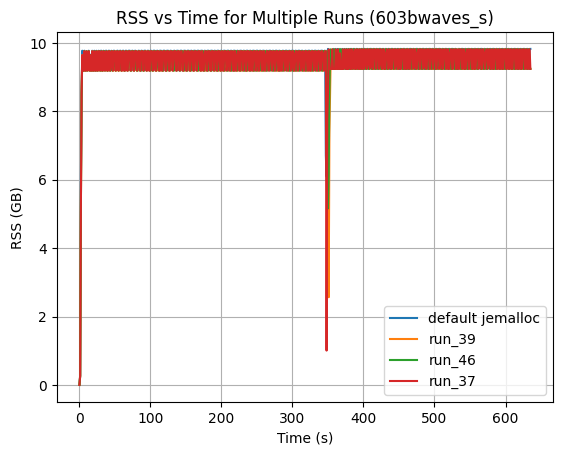

In [8]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(TS_CSV)
graph_name = TS_CSV.replace('_ts.csv', '').replace('_', '', 1)[2:]

# Extract timestamps and RSS values for each run
timestamps = df['Timestamp']
warmup = df['run_warm_up']
default = df['run_default_jemalloc']
tc_default = df['run_default_tcmalloc']

# plt.plot(timestamps, warmup / (1024*1024), label='warm_up')
plt.plot(timestamps, default, label='default jemalloc')
#plt.plot(timestamps, tc_default / (1024*1024), label='default tcmalloc')
for column in selected_columns:  # Skip 'Timestamp'
    plt.plot(timestamps, df[column], label=column)

# Customize plot
plt.xlabel('Time (s)')
plt.ylabel('RSS (GB)')
plt.title(f'RSS vs Time for Multiple Runs ({graph_name})')
plt.legend()
plt.grid(True)

# Display plot
plt.show()


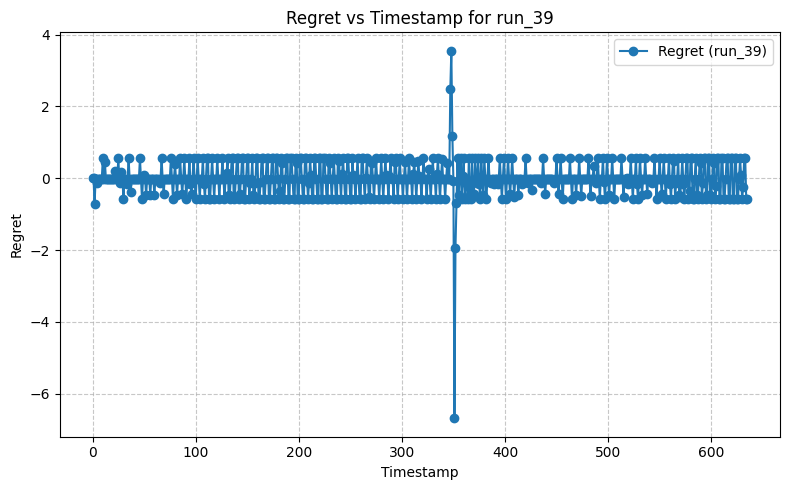

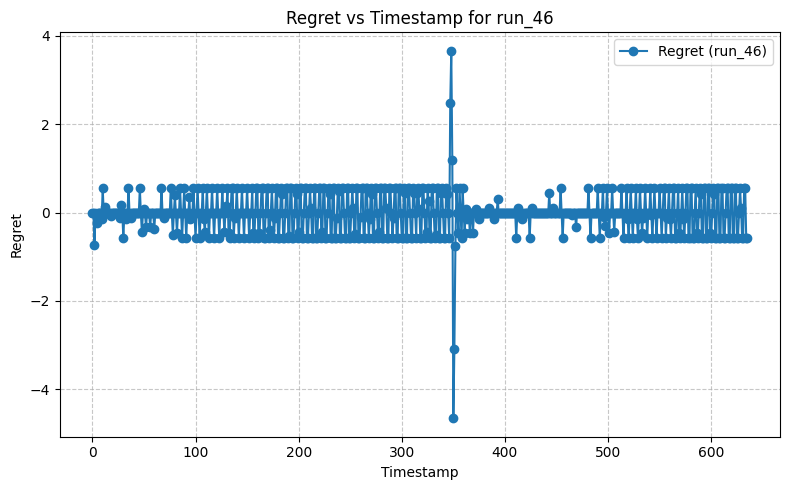

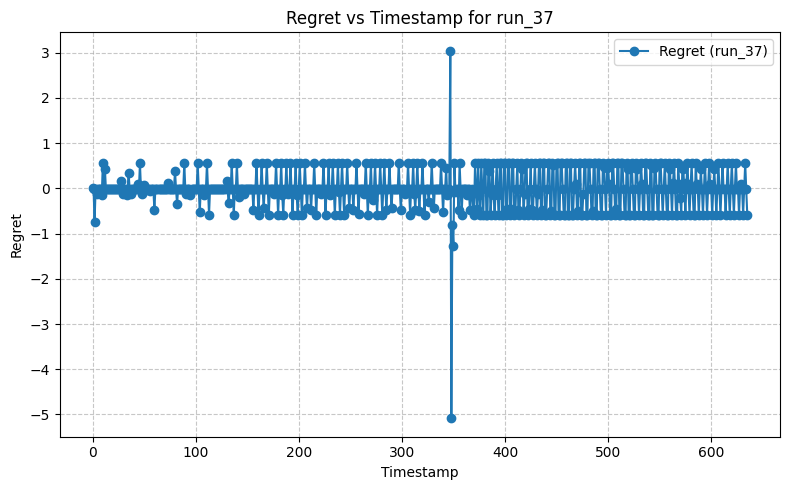

In [9]:
smallest_indices = configs.nsmallest(3, 'rss').index.tolist()

# Step 2: Map these indices to the corresponding column names in `df`
selected_columns = [f'run_{i+1}' for i in smallest_indices if f'run_{i+1}' in df.columns]

# Step 3: Generate separate plots for each selected column
for column in selected_columns:
    # Calculate regret for the current column
    regret =  (df[column] - df['run_default_jemalloc'])
    
    # Create a new plot for this column
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Plot the regret against the index
    ax.plot(regret.index, regret.values, marker='o', label=f'Regret ({column})')
    
    # Customize the plot
    ax.set_title(f'Regret vs Timestamp for {column}')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Regret')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

In [3]:
TIMESERIES_FILE = './538_imagick_r_timeseries.csv'
csvfile = pd.read_csv(TIMESERIES_FILE)
timestamps = csvfile['Timestamp']
rss_values = csvfile['RSS'] / (1024*1024)

# Plotting the RSS values over time
plt.plot(timestamps, rss_values, label='RSS over Time', marker='o')
plt.xlabel('Time (s)')  # X-axis label
plt.ylabel('RSS (MB)')  # Y-axis label
plt.title('RSS vs Time')  # Title of the plot
plt.legend()  # Display the legend
plt.grid(True)  # Add a grid for better readability

# Display the plot in the notebook
plt.show()


EmptyDataError: No columns to parse from file